In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
import os
os.listdir('./data/')

['assistments15',
 'assistments17_first_attempt',
 'ednet',
 'assistments17_single_attempt',
 'assistments09',
 'assistments12',
 'statics',
 'spanish',
 'assistments17',
 'ednet_small',
 'algebra05',
 'bridge_algebra06',
 'ednet_medium']

In [6]:
dataset_name = 'assistments15'
assert dataset_name in os.listdir('./data/')
dataset_train = pd.read_csv('./data/{}/'.format(dataset_name) + 'preprocessed_data_train.csv', sep="\t")
dataset_test = pd.read_csv('./data/{}/'.format(dataset_name) + 'preprocessed_data_test.csv', sep="\t")
dataset_total = pd.concat([dataset_train, dataset_test], axis=0)
dataset = dataset_total
summary_dict = {}
dist_dict = {}

In [7]:
# Group Analysis
for groupby in ['user_id', 'item_id', 'skill_id', ['user_id', 'item_id'], ['user_id', 'skill_id'], ['skill_id', 'item_id']]:
    group_key = groupby.replace('_id', '') if isinstance(groupby, str) else '({},{})'.format(groupby[0].replace('_id', ''), groupby[1].replace('_id', ''))
    per_key_distribution = dataset.groupby(by=groupby).apply(len)
    dist_dict[group_key] = per_key_distribution
    if isinstance(groupby, list):
        per_key_distribution = per_key_distribution.unstack(0).fillna(0).stack(0)
    dist_stat = per_key_distribution.describe()
    dist_stat.loc['density'] = len(per_key_distribution.loc[per_key_distribution > 0])/len(per_key_distribution)
    summary_dict['#{}_stat'.format(group_key)] = dist_stat
    if dist_stat['density'] < 1:
        summary_dict['#{}_nonzero_stat'.format(group_key)] = dataset.groupby(by=groupby).apply(len).describe()



In [8]:
stat_keys = [key for key in summary_dict.keys() if key.endswith('_stat')]
rename_keys = [key.replace('#', '# data per ').replace('_stat', '') for key in stat_keys]
summary_table = pd.concat([summary_dict[key] for key in stat_keys], axis=1, \
    keys=rename_keys).T.round(3)
summary_table.columns = ['unique count', 'avg', 'std', '0%(min)', '25%', '50%(med)', '75%', '100%(max)', 'matrix density']
print(summary_table)

                                 unique count       avg       std  0%(min)  \
# data per user                       14228.0    46.117    43.660     10.0   
# data per item                         100.0  6561.540  4190.660    265.0   
# data per skill                        100.0  6561.540  4190.660    265.0   
# data per (user,item)              1422800.0     0.461     2.089      0.0   
# data per (user,item)_nonzero       116441.0     5.635     4.918      1.0   
# data per (user,skill)             1422800.0     0.461     2.089      0.0   
# data per (user,skill)_nonzero      116441.0     5.635     4.918      1.0   
# data per (skill,item)               10000.0    65.615   774.695      0.0   
# data per (skill,item)_nonzero         100.0  6561.540  4190.660    265.0   

                                     25%  50%(med)     75%  100%(max)  \
# data per user                    18.00      31.0    59.0      618.0   
# data per item                  3038.75    5994.5  9169.0    21092.0   


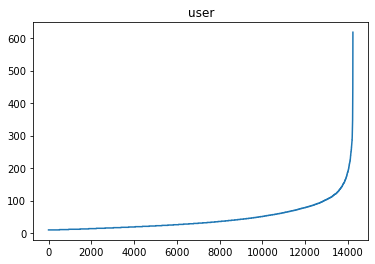

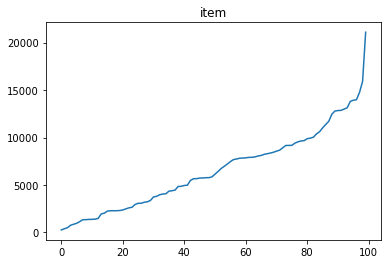

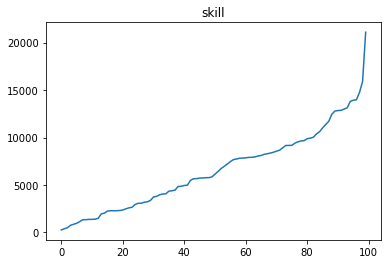

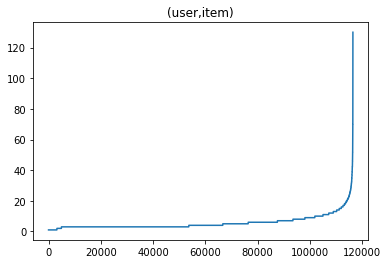

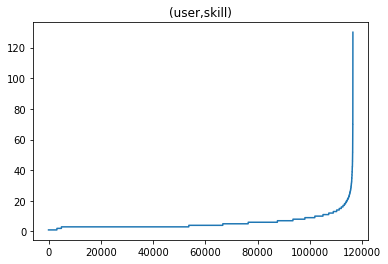

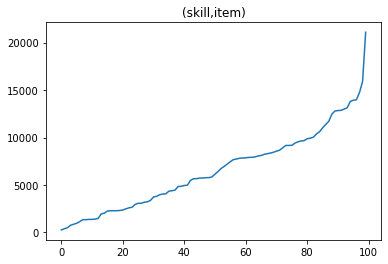

In [9]:
for dist_key, dist in dist_dict.items():
    show_hist = False
    show_cum_chart = True
    if show_hist:
        plt.figure()
        dist.reset_index(drop=True).hist(bins=100)
        plt.title(dist_key)
    if show_cum_chart:
        plt.figure()
        dist.sort_values().reset_index(drop=True).plot()
        plt.title(dist_key)
    
    
